- Data (prepare and load)
- build model
- fitting the model to data (training)
- making prediction (inference)
- saving and loading a model
- putting things all together

In [1]:
import torch
from torch import nn # nn contains all pytorch building blocks for neural network
import matplotlib.pyplot as plt
#check version
torch.__version__

'1.12.1+cpu'

# Preparing and loading data
#use of linear regresssion

In [4]:
#create known parameters
weight= 0.7
bias=0.3

In [11]:
#create data
start=0
end=1
step=0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y= bias + X* weight

In [15]:
X[:10,:],y[:10,:]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [16]:
#spliting into training and test sets

In [19]:
X_train,y_train=X[:40],y[:40]
X_test,y_test=X[40:],y[40:]

In [21]:
#visualize the data
def plot_prediction(train_data=X_train, 
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                   predictions=None):
    ''' plot training data, test data and compares predictions'''
    plt.figure(figsize=(10,7))
    # plot training in blue
    plt.scatter(train_data,train_label,c="b",s=4,label="training data")
    # plot training in blue
    plt.scatter(test_data,test_label,c="g",s=4,label="testing data")
    
    #checking predictin
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="prediction data")
    #show the legeng
    plt.legend(prop={"size":14})

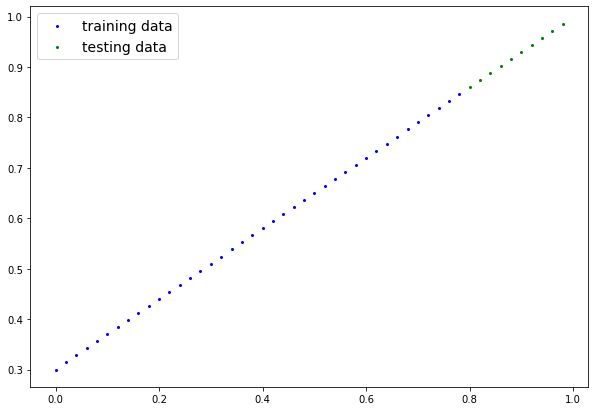

In [22]:
plot_prediction()

In [26]:
#building the model
#create linear regression model class
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float
                                          ))
        #forward method to define computation
    def forward(self, x: torch.Tensor) ->torch.Tensor:
        return self.weights*x +self.bias

# pytorch model building essentials

- torch.nn for graphs
- torch.nn.Parameter - parameter that module will learn
- torch.nn.Module -the base class for all the neural network model, if you sub class it, you should overwrite forward
- torch.optim- this will help in gradient discent to update weights
- def forward() - nn.Module should override
- torch.utils.data.Dataset represents a map between key(label) and sample (features) pairs of the data
- torch.utils.data.Dataloader creates a python iterable over a torch Dataset ( allows you to iterate over your data)

In [77]:
#checking the content of the model
torch.manual_seed(42)
#instance of the model
model_0=LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [78]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# making prediction using torch.inference_model() analogous to torch.no_grad()

In [79]:
#making prediction using torch.inference_model()
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

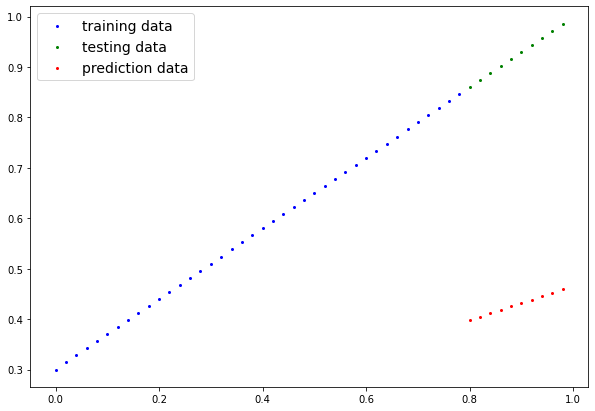

In [80]:
plot_prediction(predictions=y_preds)

## training a model with pytorch

In [81]:
#setup a loss function
loss_fn=nn.L1Loss()

#setup an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.01,momentum=0.9)

# building a training loop and testing loop
- lopp through the data
- forward pass ( data moving through our forward function)
- Calculate the loss ( compare forward pass pred to ground truths)
-  optimizer zero grad
- loss backward - move backwards to calculate the gradients with respect to the loss ( ** back propagation ** )
- optimizer step - use the optimizer to adjust the model parameter's to reduce the loss ( ** gradient descent ** )

In [82]:
import logging
logging.basicConfig(filename="torch.log",level=logging.INFO,format="%(asctime)s %(levelname)s %(message)s")

In [83]:
# set the epoch
epochs=200
#tracking  the values
epoch_count=[]
loss_values=[]
test_loss_values=[]
#training 
# loop throufh the data
for epoch in range(epochs):
        # set the model to training mode
        model_0.train() # train mode in pytorch set all the paramaters that requires gradients to require gradients
        
        #1. forward pass
        y_pred=model_0(X_train)
        # 2. calculate the loss
        loss=loss_fn(y_pred,y_train) 
        #3. optimizer zero grad
        optimizer.zero_grad() #if removed the optimizer accumulates the update step
        
        #4. perform back propagation on the loss with respect to the parameters of the model
        loss.backward()
        
        #5. step the optimizer( perform the gradien descent)
        optimizer.step()
        
        
        #model_0.eval() # turns off the gradient tracking
        model_0.eval()
        with torch.inference_mode():
            # 1. forward pass in testing mode
            test_pred=model_0(X_test)
            # 2. Calculate the test loss
            test_loss=loss_fn(test_pred,y_test)
        if epoch%10==0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            logging.info(f"Model ran in epoch {epoch} with loss of {loss}  and test loss of {test_loss} ")
            print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")
else:
    logging.shutdown()

Epoch : 0 | Loss : 0.31288138031959534 | Test loss : 0.48106518387794495
Epoch : 10 | Loss : 0.10313145816326141 | Test loss : 0.026505161076784134
Epoch : 20 | Loss : 0.06960087269544601 | Test loss : 0.1943041831254959
Epoch : 30 | Loss : 0.04656733572483063 | Test loss : 0.027078520506620407
Epoch : 40 | Loss : 0.021285563707351685 | Test loss : 0.001966828014701605
Epoch : 50 | Loss : 0.015717655420303345 | Test loss : 0.0101406155154109
Epoch : 60 | Loss : 0.009445302188396454 | Test loss : 0.0240285936743021
Epoch : 70 | Loss : 0.00741451233625412 | Test loss : 0.007351106498390436
Epoch : 80 | Loss : 0.0018297791248187423 | Test loss : 0.00930970348417759
Epoch : 90 | Loss : 0.004054549150168896 | Test loss : 0.004079192876815796
Epoch : 100 | Loss : 0.005789103917777538 | Test loss : 0.011751502752304077
Epoch : 110 | Loss : 0.004738835152238607 | Test loss : 0.0048580230213701725
Epoch : 120 | Loss : 0.005505512002855539 | Test loss : 0.010634821839630604
Epoch : 130 | Loss : 

In [84]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7034])), ('bias', tensor([0.2938]))])

In [85]:
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds,y_test

(tensor([[0.8565],
         [0.8706],
         [0.8847],
         [0.8987],
         [0.9128],
         [0.9269],
         [0.9409],
         [0.9550],
         [0.9691],
         [0.9831]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [89]:
loss_values=torch.tensor(loss_values).numpy()
test_loss_values=torch.tensor(test_loss_values).numpy()


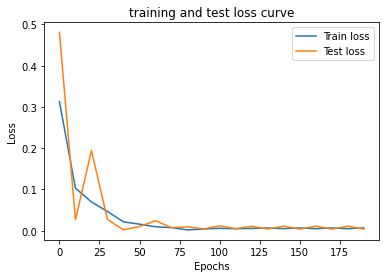

In [91]:
#plot
plt.plot(epoch_count,loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("training and test loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# saving the model


### three methods
- torch.save()
- torch.load()
- torch.nn.Module.load_state_dict()

In [108]:
#saving our pytorch modl
from pathlib import Path
import os
#1.create a model directory
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
#2. model save path
model_name="model_0.pth"
model_save_path=os.path.join(os.path.abspath(os.getcwd()),model_name)
model_save_path

'C:\\Users\\arpan\\Desktop\\Full stack data science\\model_0.pth'

In [111]:
#3. save the model state dict
torch.save(obj=model_0.state_dict(),f=model_save_path)

In [113]:
model=LinearRegression()

In [114]:
model.load_state_dict(torch.load("model_0.pth"))

<All keys matched successfully>

In [115]:
model.state_dict()

OrderedDict([('weights', tensor([0.7034])), ('bias', tensor([0.2938]))])

In [116]:
#make some prediction

In [125]:
model.eval()
with torch.inference_mode():
    print(model(torch.tensor(3)))

tensor([2.4039])


In [135]:
#alll things together
import torch 
from torch import nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [128]:
#create  device agnostic code:
device="cuda" if torch.cuda.is_available() else "cpu"

In [132]:
#data
weight =0.4
bias = 9
start=1
end= 100
step=2
X=torch.arange(start,end,step,dtype=torch.float32).unsqueeze(dim=1)
y=bias+weight*X

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [162]:
def plot(X_train=X_train,X_test=X_test,
        y_train=y_train,y_test=y_test,
        prediction=None):
    ''' plot the data'''
    plt.figure(figsize=(10,7))
    plt.scatter(X_train,y_train,c="b",label="Training")
    plt.scatter(X_test,y_test,c="r",label="Test")
    plt.xlabel("X")
    plt.ylabel("y")
    if prediction is not None:
        plt.scatter(X_test,prediction,c="g",label="Prediction")
    plt.legend(prop={"size":14})
    



In [163]:
class LinerReg(nn.Module):
    def __init__(self):
        super(LinerReg,self).__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float32))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float32))
        
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x +self.bias

In [180]:
torch.manual_seed(32)
model=LinerReg()
model.state_dict()

OrderedDict([('weights', tensor([0.8757])), ('bias', tensor([0.2721]))])

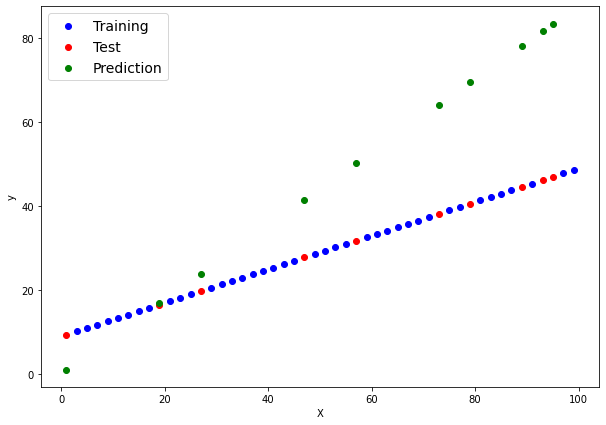

In [181]:
with torch.inference_mode():
    y_pred=model(X_test)
plot(prediction=y_pred)

In [182]:
#setiing loss and opt
loss_func=nn.MSELoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.01)

In [183]:
torch.manual_seed(42)
epochs=1000
epoch_count=[]
train_loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
    model.train()
    y_pred=model(X_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_pred=model(X_test)
        loss_pred=loss_func(test_pred,y_test.type(torch.float))
        
        if epoch %10==0:
            print(f"Epoch: {epoch} train loss {loss:.2f} test loss {loss_pred:.2f}")
            epoch_count.append(epoch)
            train_loss_values.append(loss)
            test_loss_values.append(loss_pred)

Epoch: 0 train loss 15.69 test loss 552.23
Epoch: 10 train loss 11.29 test loss 288.03
Epoch: 20 train loss 7.28 test loss 115.37
Epoch: 30 train loss 4.41 test loss 32.63
Epoch: 40 train loss 3.88 test loss 18.80
Epoch: 50 train loss 3.84 test loss 18.35
Epoch: 60 train loss 3.70 test loss 20.45
Epoch: 70 train loss 3.66 test loss 19.49
Epoch: 80 train loss 3.61 test loss 17.89
Epoch: 90 train loss 3.57 test loss 17.83
Epoch: 100 train loss 3.53 test loss 17.75
Epoch: 110 train loss 3.49 test loss 17.14
Epoch: 120 train loss 3.45 test loss 16.67
Epoch: 130 train loss 3.41 test loss 16.28
Epoch: 140 train loss 3.38 test loss 15.87
Epoch: 150 train loss 3.34 test loss 15.52
Epoch: 160 train loss 3.30 test loss 15.18
Epoch: 170 train loss 3.26 test loss 14.80
Epoch: 180 train loss 3.22 test loss 14.45
Epoch: 190 train loss 3.18 test loss 14.09
Epoch: 200 train loss 3.14 test loss 13.74
Epoch: 210 train loss 3.10 test loss 13.37
Epoch: 220 train loss 3.06 test loss 13.03
Epoch: 230 train 

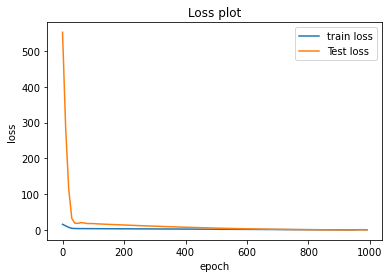

In [184]:
plt.plot(epoch_count,torch.tensor(train_loss_values).detach().numpy(),label="train loss")
plt.plot(epoch_count,torch.tensor(test_loss_values).detach().numpy(),label="Test loss")
plt.title("Loss plot")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

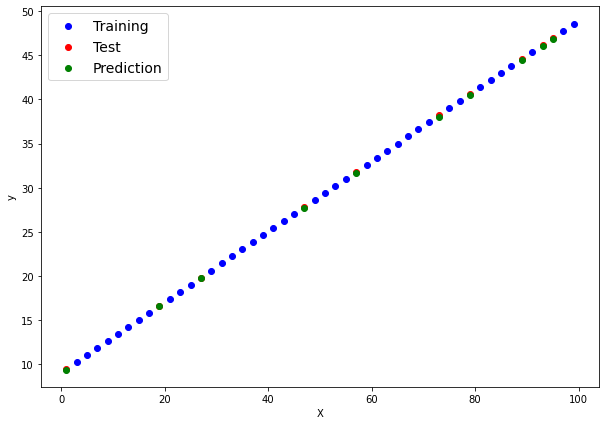

In [185]:
model.eval()
with torch.inference_mode():
    y_pred=model(X_test)
plot(prediction=y_pred)

In [187]:
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="model.pth"
model_path_save=model_path/model_name


WindowsPath('models/model.pth')

In [189]:
torch.save(obj=model.state_dict(),f="model1.pth")

In [190]:
model2=LinerReg()
model.load_state_dict(torch.load("model1.pth"))

<All keys matched successfully>